# Hydrograph Development Notebooks

### Create a Breach Hydrograph for 2 locations at a levee using 1D HEC-RAS Model & USGS Gage Records 

### Example: Lisle, NY

In [1]:
import os
from glob import glob

from importlib import reload
import utils; reload(utils)
from utils import *
import ny_clean_nb; reload(ny_clean_nb)
from ny_clean_nb import *

import pandas as pd
import numpy as np
from scipy import interpolate 

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

###  Read in Gage data & Develop Base Hydrograph
    1. Read in Base Hydrograph & Scale to 1-pct using scale factor
    2. Manually Smooth the curve where needed
    
*See comment lines in [Helper Script](ny_clean_nb.py) for smoothing procedure.*

01511500_00065_iv.tsv
01509000_00065_iv.tsv
01509000_00060_iv.tsv
01509000_00060_dv.tsv
01509520_00065_iv.tsv




2005-04-02 00:00:00     5615.800964
2005-04-02 00:30:00     5639.200135
2005-04-02 01:00:00     5662.599305
2005-04-02 01:30:00     5685.998476
2005-04-02 02:00:00     5709.397647
2005-04-02 02:30:00     5732.796817
2005-04-02 03:00:00     5756.195988
2005-04-02 03:30:00     5779.595159
2005-04-02 04:00:00     5802.994329
2005-04-02 04:30:00     5826.393500
2005-04-02 05:00:00     5849.792671
2005-04-02 05:30:00     5873.191842
2005-04-02 06:00:00     5896.591012
2005-04-02 06:30:00     5896.591012
2005-04-02 07:00:00     5896.591012
2005-04-02 07:30:00     5976.816740
2005-04-02 08:00:00     6057.042468
2005-04-02 08:30:00     6137.268196
2005-04-02 09:00:00     6217.493924
2005-04-02 09:30:00     6297.719653
2005-04-02 10:00:00     6377.945381
2005-04-02 10:30:00     6458.171109
2005-04-02 11:00:00     6538.396837
2005-04-02 11:30:00     6618.622565
2005-04-02 12:00:00     6698.848293
2005-04-02 12:30:00     6779.074021
2005-04-02 13:00:00     6859.299749
2005-04-02 13:30:00     6939

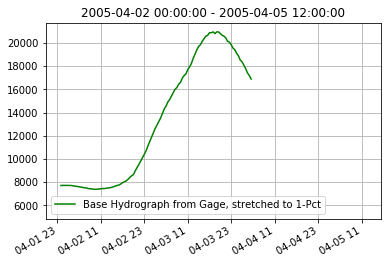

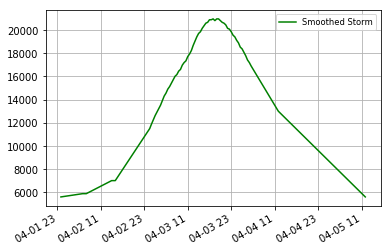

In [15]:
gage_data, data_dir = initialize()
base_storm_1pct = init_base_hydro(gage_data)
smooth_storm = smooth_base_hydro(base_storm_1pct)
smooth_storm

In [27]:
data = pd.read_csv('/Users/slawler/Repos/HydrologyTools/sample_data/lisle_event.csv', sep = '\t')
data = data.set_index(pd.DatetimeIndex(data['local']))
data.drop(axis=1,labels =['utc', 'local'], inplace=True)
data = data['2005-04-02 00:00:0':'2005-04-05 12:00:00'].copy()

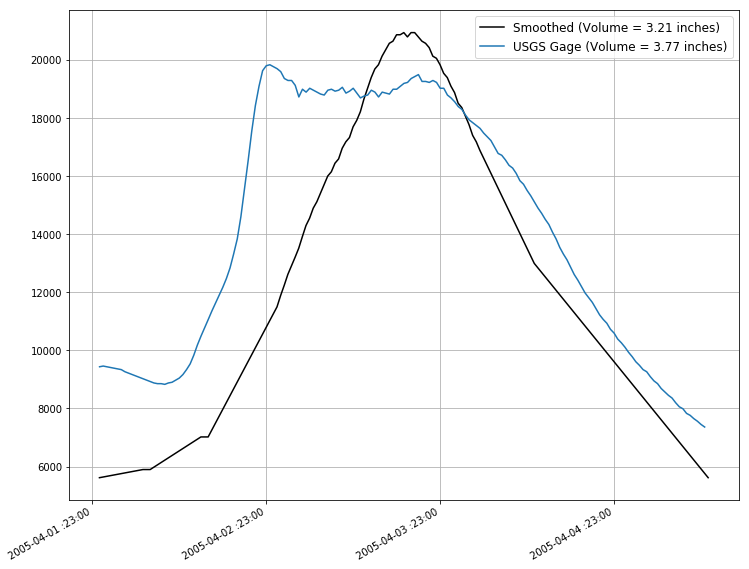

In [45]:
fig, ax = plt.subplots()
x0 = smooth_storm.index
y0 = smooth_storm.values
x1 = data.index
y1 = data.values

smooth_vol = IntegrateHydrograph(smooth_storm, 490, method = 'trapezoid')
gage_vol = IntegrateHydrograph(data, 490, method = 'trapezoid')

ax.plot(x0, y0, color='black', label = 'Smoothed (Volume = {} inches)'.format(smooth_vol))
ax.plot(x1, y1, label = 'USGS Gage (Volume = {} inches)'.format(gage_vol))
fig.set_size_inches(12,10)

import matplotlib.dates as mdates

days = mdates.HourLocator(interval = 24)   # every year
dateFmt = mdates.DateFormatter('%Y-%m-%d :%H:%M')
ax.xaxis.set_major_formatter(dateFmt)
ax.xaxis.set_major_locator(days)
ax.grid()
fig.autofmt_xdate()
ax.legend(loc= 'best',  fontsize='large')

